# Probabalistic Weather Model
### An introduction to modleing with matrices and vectors ###

![simple_weather_model.svg](../images/simple_weather_model.svg)

Consider the very simplified wather model above. Its state, the weather today, $\textbf{x}$ is a vector containing the probability for the weather to be Rainy. Nice or Cloudy. Further, the system behaviour can be described with the system matrix $\textbf{A}$ from the figure above.

$$
    \textbf{x} =
    \begin{bmatrix}
        pr(R) \\
        pr(N) \\
        pr(C) \\
    \end{bmatrix}
    ~~~~~~~~~~
    \textbf{A} =
    \begin{bmatrix}
        0.6  & 0.75 & 0.25 \\
        0.25 & 0    & 0.25 \\
        0.15 & 0.25 & 0.5  \\
    \end{bmatrix}
$$

Then, the initial state is set to be a nice day

$$
    \textbf{x}_{today} =
    \begin{bmatrix}
        1 \\
        0 \\
        0 \\
    \end{bmatrix}
$$

The weather tomorrow then has the following probability

$$
    \textbf{x}_{tomorrow} = \textbf{A}\textbf{x}_{today} =
    \begin{bmatrix}
        0.6 \\
        0.25 \\
        0.15 \\
    \end{bmatrix}
$$


In order to get the probability of the weather the day after tomorrow the same procedure as above is then applied, meaning that calulating the probability for the wather for a given next day can be described with the following equation

$$
    \textbf{x}_{k+1} = \textbf{A}\textbf{x}_{k}
$$

Take for example the days $x_{1...4}$

| $x_1$ | $x_2$  | $x_3$    | $x_4$    |
| ----- | -----  | ------   | ------   |
|       | $Ax_1$ | $A^2x_1$ | $A^3x_1$ |
|       |        | $Ax_2$   | $A^2x_2$ |
|       |        |          | $Ax_3$   |

In [5]:
import numpy as np
from matplotlib import pyplot as plt

A = np.array([
    [0.6, 0.75, 0.25],
    [0.25, 0, 0.25],
    [0.15, 0.25, 0.5]
])

x = np.array([[1],[0],[0]])

Verifying that the day tomorrow will be as the previous example

In [6]:
print(A@x)

[[0.6 ]
 [0.25]
 [0.15]]


In [7]:
no_days = 50
weather = np.zeros([3, no_days])
for k in range(no_days):
    x = A@x
    weather[:,k] = x[:,0]

Plotting the probabilites of the weather for the next 50 days, it can be seen that the probabilites converge quickly

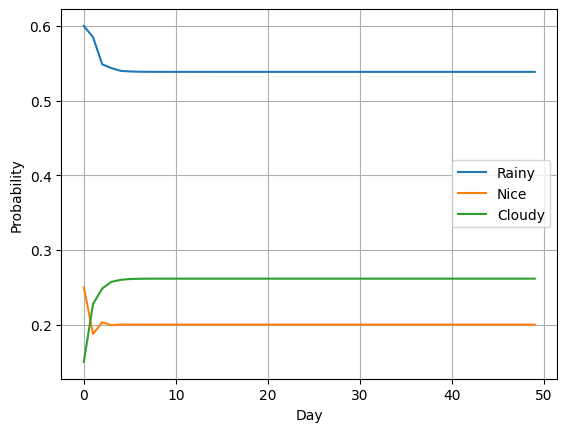

In [8]:
lines = plt.plot(weather.transpose())
plt.legend(lines, ["Rainy", "Nice", "Cloudy"])
plt.xlabel("Day")
plt.ylabel("Probability")
plt.grid(True)
